#  Bio 208: Lecture 06 -- Working with tabular data

## Pandas library

[Pandas](https://pandas.pydata.org/) is a widely used Python library for working with tabular data.

![Image from Pandas tutorial.](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)

In [1]:
import pandas as pd

### Creating DataFrames

The core data structure in the Pandas library is called a "data frame" (`DataFrame`).

We can create a dataframe by hand as follows:

In [2]:
df = pd.DataFrame({
    "Name": ["ORF1ab", "S", "E", "M", "N"],
    "Start": [266,  21563, 26245, 26523, 28274],
    "Stop": [21555, 25384, 26472, 27191, 29533],
    "Product": ["ORF1ab polyprotein", "surface glycoprotein", 
                "envelope protein", "membrane glycoprotein",
                "nucleocapsid phosphoprotein"]
})

### Reading a DataFrame from a file

In [3]:
df

,Name,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


In [4]:
df.dtypes

Name       object
Start       int64
Stop        int64
Product    object
dtype: object

### What are the dimensions (number of rows and columns) of a DataFrame?

In [5]:
df.shape

(5, 4)

### Getting a specific column from a DataFrame

In [6]:
df["Product"]

#return series of "Product" key

0             ORF1ab polyprotein
1           surface glycoprotein
2               envelope protein
3          membrane glycoprotein
4    nucleocapsid phosphoprotein
Name: Product, dtype: object

In [7]:
df.Stop

#shorthand, but would only works if "Stop" is a valid Python variable name
#retruns series of "Stop" key

0    21555
1    25384
2    26472
3    27191
4    29533
Name: Stop, dtype: int64

### Getting a subset of columns from a DataFrame

In [8]:
df.loc[:, ["Stop","Start"]]

,Stop,Start
0,21555,266
1,25384,21563
2,26472,26245
3,27191,26523
4,29533,28274


In [9]:
df.loc[:, ["Name","Product"]]

,Name,Product
0,ORF1ab,ORF1ab polyprotein
1,S,surface glycoprotein
2,E,envelope protein
3,M,membrane glycoprotein
4,N,nucleocapsid phosphoprotein


In [10]:
df.loc[1:3, ["Product", "Start"]]

,Product,Start
1,surface glycoprotein,21563
2,envelope protein,26245
3,membrane glycoprotein,26523


In [11]:
df.loc[:3, ["Product", "Start"]]

,Product,Start
0,ORF1ab polyprotein,266
1,surface glycoprotein,21563
2,envelope protein,26245
3,membrane glycoprotein,26523


In [12]:
# inclusive when use two paramters

### Getting specific rows from a DataFrame using slices

In [13]:
df["Product"]

0             ORF1ab polyprotein
1           surface glycoprotein
2               envelope protein
3          membrane glycoprotein
4    nucleocapsid phosphoprotein
Name: Product, dtype: object

In [14]:
df[0:2]

,Name,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein


In [15]:
# exclusive when use one parameter

### Selection cross sections of a DataFrame by integer positions using `DataFrame.iloc`

In [16]:
df.iloc[1:3]

,Name,Start,Stop,Product
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein


In [17]:
df.iloc[:3, :2]

,Name,Start
0,ORF1ab,266
1,S,21563
2,E,26245


### Subsetting the rows of a DataFrame by Boolean indexing

In [18]:
x = df["Start"] > 25000
print(x)
# understanding inner loop of Boolean indexing

0    False
1    False
2     True
3     True
4     True
Name: Start, dtype: bool


In [19]:
df[df["Start"] > 25000]

,Name,Start,Stop,Product
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


In [20]:
endgenes = df[df.Start > 25000]
print(endgenes)

  Name  Start   Stop                      Product
2    E  26245  26472             envelope protein
3    M  26523  27191        membrane glycoprotein
4    N  28274  29533  nucleocapsid phosphoprotein


In [21]:
df[x]

,Name,Start,Stop,Product
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


In [32]:
df[df.Start > 25000]["Start"]
# to get only column

2    26245
3    26523
4    28274
Name: Start, dtype: int64

In [33]:
#alternative method:
endgenes["Start"]

2    26245
3    26523
4    28274
Name: Start, dtype: int64

### More complex subsetting using Boolean operators

In [34]:
df

,Name,Start,Stop,Product,Lengths
0,ORF1ab,266,21555,ORF1ab polyprotein,21289
1,S,21563,25384,surface glycoprotein,3821
2,E,26245,26472,envelope protein,227
3,M,26523,27191,membrane glycoprotein,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259


In [35]:
"glycoprotein" in df["Product"]

False

### Creating new columns by computing on existing columns

In [36]:
# calculation of lengths
df.Stop - df.Start

0    21289
1     3821
2      227
3      668
4     1259
dtype: int64

In [40]:
# assigning calculation of lengths to new column
df["Length"] = df.Stop - df.Start
df

,Name,Start,Stop,Product,Lengths,Length
0,ORF1ab,266,21555,ORF1ab polyprotein,21289,21289
1,S,21563,25384,surface glycoprotein,3821,3821
2,E,26245,26472,envelope protein,227,227
3,M,26523,27191,membrane glycoprotein,668,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259,1259


In [41]:
df[(df.Start > 25000) & (df.Length > 500)]

,Name,Start,Stop,Product,Lengths,Length
3,M,26523,27191,membrane glycoprotein,668,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259,1259


### Creating plots from DataFrames

In [42]:
df

,Name,Start,Stop,Product,Lengths,Length
0,ORF1ab,266,21555,ORF1ab polyprotein,21289,21289
1,S,21563,25384,surface glycoprotein,3821,3821
2,E,26245,26472,envelope protein,227,227
3,M,26523,27191,membrane glycoprotein,668,668
4,N,28274,29533,nucleocapsid phosphoprotein,1259,1259


In [44]:
from matplotlib import pyplot as plt

(array([3., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  227. ,  2333.2,  4439.4,  6545.6,  8651.8, 10758. , 12864.2,
        14970.4, 17076.6, 19182.8, 21289. ]),
 <a list of 10 Patch objects>)

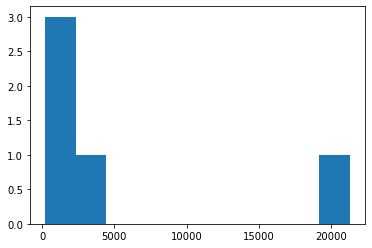

In [45]:
plt.hist(df.Length)

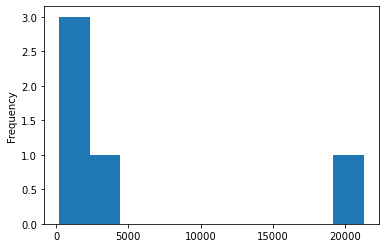

In [46]:
df["Length"].plot.hist()

### Summary statistics from DataFrames

In [47]:
# mean of gene lenghts
df["Length"].mean()

5452.8

In [48]:
# median of gene lengths
df["Length"].median()

1259.0

In [51]:
# mode of gene lengths
df["Lengths"].mode()

0      227
1      668
2     1259
3     3821
4    21289
dtype: int64

## Working with a table of features from the Saccharomyces Genome Database (SGD)

The file [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) is a tab-delimited file I downloaded from SGD that summarizes key pieces of information about genome features in the budding yeast genome.  The original file can be found here: http://sgd-archive.yeastgenome.org/curation/chromosomal_feature/

Here's a short summary of the contents of this file, from the "SGD_features.README" document:

```
1. Information on current chromosomal features in SGD, including Dubious ORFs. 
Also contains coordinates of intron, exons, and other subfeatures that are located within a chromosomal feature.

2. The relationship between subfeatures and the feature in which they
are located is identified by the feature name in column #7 (parent
feature). For example, the parent feature of the intron found in
ACT1/YFL039C will be YFL039C. The parent feature of YFL039C is
chromosome 6.

3. The coordinates of all features are in chromosomal coordinates.

Columns within SGD_features.tab:

1.   Primary SGDID (mandatory)
2.   Feature type (mandatory)
3.   Feature qualifier (optional)
4.   Feature name (optional)
5.   Standard gene name (optional)
6.   Alias (optional, multiples separated by |)
7.   Parent feature name (optional)
8.   Secondary SGDID (optional, multiples separated by |)
9.   Chromosome (optional)
10.  Start_coordinate (optional)
11.  Stop_coordinate (optional)
12.  Strand (optional)
13.  Genetic position (optional)
14.  Coordinate version (optional)
15.  Sequence version (optional)
16.  Description (optional)

Note that "chromosome 17" is the mitochondrial chromosome.
```


Download [`SGD_features.tsv`](https://github.com/bio208fs-class/bio208fs-lecture/raw/master/data/SGD_features.tsv) to your computer and then load it using the `read_csv` function, specifying the delimiter argument as a tab:

In [53]:
features = pd.read_csv("C:/Users/cleve/OneDrive/Documents/Notes/Notebooks Linked Materials/Duke University/Bio 208 Computing on the Genome/SGD_features.tsv", delimiter = "\t")

In [54]:
features.shape

(16454, 16)

In [55]:
features.head()

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description
0,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...
1,S000031098,CDS,NaN,NaN,NaN,NaN,YAL069W,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,NaN
2,S000028594,ORF,Dubious,YAL068W-A,NaN,NaN,chromosome 1,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,Dubious open reading frame; unlikely to encode...
3,S000031372,CDS,NaN,NaN,NaN,NaN,YAL068W-A,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,NaN
4,S000121252,ARS,NaN,ARS102,NaN,ARSI-1,chromosome 1,NaN,1,707.0,776.0,NaN,NaN,11/18/14,2014-11-18|2007-03-07,Autonomously Replicating Sequence


In [56]:
# function to read tsv
def read_tsv(fname):
        return pd.read_csv(fname, delimiter="\t")

### How many genome features are there in the  yeast genome?

### How  many of those features are annotated as "ORFs" (open reading frames)?

In [58]:
orfs = features[features.Type == "ORF"]
orfs.shape

(6604, 16)

In [59]:
dubious_ones = features[features.Qualifier == "Dubious"]
dubious_ones.shape

(717, 16)

In [61]:
dubious = orfs[orfs.Qualifier == "Dubious"]
dubious.shape

(717, 16)

In [63]:
validated = orfs[orfs.Qualifier == "Verified"]
validated.shape

(5155, 16)

In [ ]:
# 5155 + 717 != 6604, so must be classificiations in between

### How many of the ORFS are designated as "Dubious"? How many are "Validated"?

In [64]:
orfs["Length"] = orfs.Stop - orfs.Start
# error code irrelevant, still get Length in orfs

<ipython-input-64-2ee101a0b9af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orfs["Length"] = orfs.Stop - orfs.Start


In [65]:
orfs

,SGDID,Type,Qualifier,Name,Gene,Alias,Parent,Secondary,Chromosome,Start,Stop,Strand,GeneticPosition,CoordVersion,SeqVersion,Description,Length
0,S000002143,ORF,Dubious,YAL069W,NaN,NaN,chromosome 1,NaN,1,335.0,649.0,W,NaN,7/31/96,7/31/96,Dubious open reading frame; unlikely to encode...,314.0
2,S000028594,ORF,Dubious,YAL068W-A,NaN,NaN,chromosome 1,NaN,1,538.0,792.0,W,NaN,7/29/03,7/29/03,Dubious open reading frame; unlikely to encode...,254.0
9,S000002142,ORF,Verified,YAL068C,PAU8,seripauperin PAU8,chromosome 1,NaN,1,2169.0,1807.0,C,NaN,7/31/96,7/31/96,Protein of unknown function; member of the ser...,-362.0
11,S000028593,ORF,Uncharacterized,YAL067W-A,NaN,NaN,chromosome 1,NaN,1,2480.0,2707.0,W,NaN,7/29/03,7/29/03,Putative protein of unknown function; identifi...,227.0
14,S000000062,ORF,Verified,YAL067C,SEO1,putative permease SEO1,chromosome 1,L000003363,1,9016.0,7235.0,C,NaN,2/3/11,7/31/96,Putative permease; member of the allantoate tr...,-1781.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,S000001477,ORF,Verified,YIR038C,GTT1,bifunctional glutathione transferase/peroxidase,chromosome 9,L000004612,9,424513.0,423809.0,C,NaN,2/3/11,12/10/94,ER associated glutathione S-transferase; capab...,-704.0
16375,S000001478,ORF,Verified,YIR039C,YPS6,aspartyl protease,chromosome 9,L000004386,9,432111.0,430498.0,C,NaN,2/3/11,12/10/94,Putative GPI-anchored aspartic protease; membe...,-1613.0
16377,S000001479,ORF,Dubious,YIR040C,NaN,NaN,chromosome 9,NaN,9,433721.0,433389.0,C,NaN,2/3/11,12/10/94,Dubious open reading frame; unlikely to encode...,-332.0
16379,S000001480,ORF,Verified,YIR041W,PAU15,seripauperin PAU15,chromosome 9,NaN,9,433929.0,434303.0,W,NaN,2/3/11,12/10/94,Protein of unknown function; member of the ser...,374.0


In [69]:
# plotting distribution of Dubious genes in Verified genes
plt.hist(validated.Length, alpha = 0.5)
# will pick up correcting this error on Tuesday and the fact that some of the outputs are negative

AttributeError: 'DataFrame' object has no attribute 'Length'

### What is the distribution of length of dubious ORFs? What is the distribution of lengths of validate ORFs?

### Using the groupby method to calculate aggregate statistics